# Cross Validation

👇 Import the `university_admissions.csv` dataset located in the data folder and display its first 5 rows

In [106]:
import pandas as pd
uni_df = pd.read_csv('data/university_admissions.csv')

The dataset:
- `rating` : the rating of the university in a range [0,5]
- `CGPA` : the Cumulative Grade Points Average of the student
- `admitted` : whether or not a student is admitted to the university
    
The task is to predict if a student will be admitted or not considering his CGPA and the rating of the university he is applying to.

## Data Exploration

👇 How many observations are there in the dataset?

In [107]:
uni_df.info()
uni_df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   rating    50 non-null     int64  
 1   CGPA      50 non-null     float64
 2   admitted  50 non-null     bool   
dtypes: bool(1), float64(1), int64(1)
memory usage: 978.0 bytes


(50, 3)

👇 How many observations of each class?

In [108]:
uni_df['admitted'].value_counts()

False    26
True     24
Name: admitted, dtype: int64

## Baseline Score

👇 Generate a cross-validated baseline score with Sklearn's `DummyClassifier`
- Use the baseline strategy and scoring metric you feel are appropriate for the task
- Do not preprocess the features just yet

👉 [`DummyClassifier` documentation](https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html)


<details>
<summary> 💡Hints </summary>

- As a baseline score srategy, you could choose to always predict the most frequent class, or to generate predictions by respecting the training set’s class distribution.
    

- Since the classes are balanced and both equally as important, you can use the accuracy metric to score the baseline

</details>



In [109]:
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split

# Ready X and y
X = uni_df[['rating','CGPA']]
y = uni_df['admitted']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

# Baseline model
baseline_model = DummyClassifier(strategy = 'most_frequent')

# Cross validate model
from sklearn.model_selection import cross_validate, cross_val_predict
cv_results = cross_validate(baseline_model, X, y, cv=5)
display(cv_results)

# Baseline Accuracy
from sklearn.metrics import accuracy_score
uni_df['predictions'] = cross_val_predict(baseline_model, X ,y)
# acuracy = cv_results["test_score"].mean()
print('Accuracy =', round(accuracy_score(y, uni_df['predictions']), 3))

{'fit_time': array([0.00152254, 0.00137615, 0.00142765, 0.00133729, 0.00143456]),
 'score_time': array([0.00059247, 0.00058651, 0.00068498, 0.00071144, 0.00063133]),
 'test_score': array([0.5, 0.5, 0.5, 0.5, 0.6])}

Accuracy = 0.52


##  KNN model

👇 Cross-validate a `KNeighborsClassifier` using the same metric as your baseline. 
- Do not preprocess the features just yet

👉 [`cross_validate` documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html)

In [110]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Baseline model
KNN_model = KNeighborsClassifier()

# # Cross validate model
cv_results = cross_validate(KNN_model, X, y, cv=5)
display(cv_results)

# KNN Accuracy
uni_df['predictions'] = cross_val_predict(KNN_model, X ,y)
print('Accuracy =', round(accuracy_score(y, uni_df['predictions']), 3))

{'fit_time': array([0.00804853, 0.005867  , 0.00394654, 0.00311446, 0.00250983]),
 'score_time': array([0.00769281, 0.00564885, 0.00393486, 0.00348186, 0.00275922]),
 'test_score': array([0.7, 0.6, 0.9, 0.7, 1. ])}

Accuracy = 0.78


You should be getting an accuracy above 70%, an improvement from the baseline score! However, it could be better. Remember that KNN models are extremely sensitive to magnitude of features?

## Advanced KNN model

👇 Check the distribution of the features and scale them accordingly. With the scaled features, cross-validate a `KNeighborsClassifier`.

<AxesSubplot:ylabel='Frequency'>

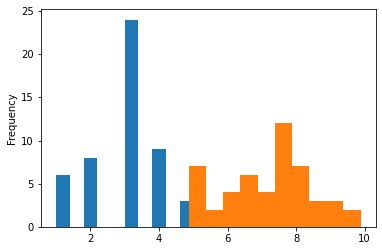

In [111]:
# Check feature distribution with histograms
uni_df['rating'].plot.hist()
uni_df['CGPA'].plot.hist()

In [113]:
# Scale features
scale = ['rating', 'CGPA']
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(uni_df[scale])
uni_df[['scaled_r', 'scaled_CGPA']] = scaler.transform(uni_df[scale])

# Cross validate KNN with scaled features
KNN_model = KNeighborsClassifier()
cv_results = cross_validate(KNN_model, uni_df[['scaled_r', 'scaled_CGPA']], y, cv=5)
display(cv_results)

uni_df['predictions_2'] = cross_val_predict(KNN_model, X ,y)
print('Accuracy =', round(accuracy_score(y, uni_df['predictions_2']), 3))
Friend

{'fit_time': array([0.00371695, 0.00336218, 0.00241017, 0.00286984, 0.00209928]),
 'score_time': array([0.0057919 , 0.00464392, 0.00285506, 0.00266957, 0.00224757]),
 'test_score': array([0.8, 0.6, 0.9, 0.8, 1. ])}

Accuracy = 0.78


array([[1.07349008, 0.63620195]])

Scaling the features should have improved the performance of the model!

## Predictions

A friend of yours with a CGPA of 8 has just applied to a university of rating 4. 

👇 Use your model to let him know if he will get in. Make sure you scale your friend's data with the same scaler you use on the training data.

In [120]:
# Make list with datapoints
Friend = ['4','8']
# Scale using original scaler
Friend = scaler.transform([Friend])
# Train a model on the scaled data
X_train, X_test, y_train, y_test = train_test_split(uni_df[['scaled_r', 'scaled_CGPA']], y, test_size = 0.3)
KNN_model.fit(X_train, y_train)
KNN_model.predict_proba(Friend)

array([[0.2, 0.8]])

⚠️ Please, push the exercice once you have completed it. Thank you 🙃

# 🏁